<a href="https://colab.research.google.com/github/Nawaf9997/reference-ML-S-/blob/main/KNN_Classifier_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Print the keys of the dataset
print(mnist.keys())

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [2]:
X, y = mnist["data"], mnist["target"]
print(X.shape)


(70000, 784)


In [3]:
y = y.astype(np.uint8)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42, stratify=y)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [8]:
y_knn_pred = knn_clf.predict(X_test)

In [10]:
# Importing the accuracy_score function from scikit-learn's metrics module
from sklearn.metrics import accuracy_score

# Calculating the accuracy score by comparing the true labels (y_test) with the predicted labels (y_knn_pred)
accuracy = accuracy_score(y_test, y_knn_pred)

# Displaying the accuracy score
accuracy

1.0

In [11]:
some_digit = X[5]

In [12]:
# Define a function to plot a digit
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=mpl.cm.binary, interpolation="nearest")
    plt.axis("off")

In [14]:
ambiguous_digit = X_test[250]
probabilities = knn_clf.predict_proba([ambiguous_digit])

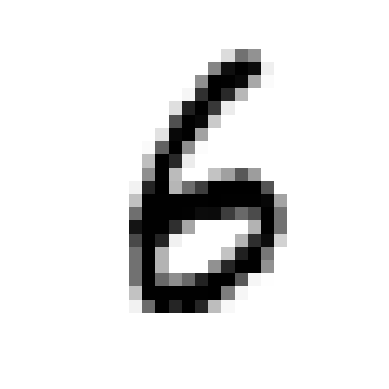

In [15]:
plot_digit(ambiguous_digit)

In [16]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)


KNeighborsClassifier()

In [17]:
knn_clf.predict([some_digit])

array([[False, False]])

In [18]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9770714128542544

In [19]:
# Importing GridSearchCV from scikit-learn's model_selection module
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for hyperparameter tuning
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

# Creating a K-nearest neighbors classifier instance
knn_clf = KNeighborsClassifier()

# Performing grid search with cross-validation to find the best combination of hyperparameters
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)

# Fitting the grid search object to the training data to identify the optimal hyperparameters
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  35.8s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.973 total time=  32.2s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  33.4s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  33.0s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.968 total time=  33.1s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.974 total time=  35.2s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.975 total time=  32.2s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.974 total time=  32.7s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  32.4s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.969 total time=  32.7s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.970 total time=  33.0s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [20]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [21]:
grid_search.best_score_

0.9729833333333333

In [ ]:

# Predicting labels for the test data (X_test) using the best estimator found by the grid search (grid_search)
y_pred = grid_search.predict(X_test)

# Calculating the accuracy score by comparing the true labels (y_test) with the predicted labels (y_pred)
accuracy_score(y_test, y_pred)